In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
#loading dataset
df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df_diabetes.shape

(768, 9)

In [5]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

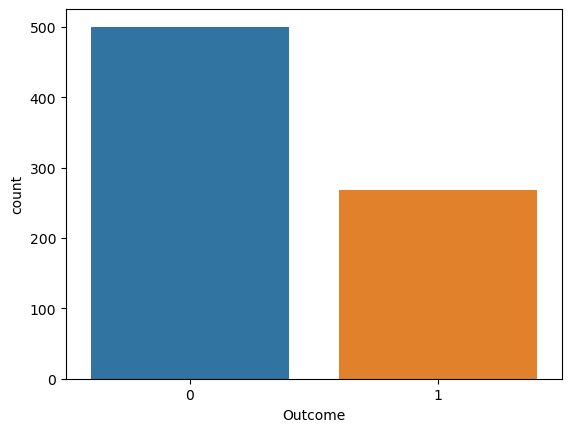

In [8]:
#checking output is balanced or not because of equal importance to both outputs
import seaborn as sns
sns.countplot(x='Outcome',data=df_diabetes)

In [9]:
df_diabetes[(df_diabetes['Outcome']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [10]:
df_diabetes[(df_diabetes['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [11]:
#handling imbalanced dataset
from sklearn.utils import resample

majoroty_cls = df_diabetes[(df_diabetes['Outcome']==0)]
minority_cls = df_diabetes[(df_diabetes['Outcome']==1)]
#upsample minority class
minority_cls_upsampled = resample(minority_cls,replace=True, n_samples=490,random_state=0)
df_resampled = pd.concat([minority_cls_upsampled, majoroty_cls])
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134,70,0,0,28.9,0.542,23,1
128,1,117,88,24,145,34.5,0.403,40,1
306,10,161,68,23,132,25.5,0.326,47,1
542,10,90,85,32,0,34.9,0.825,56,1
730,3,130,78,23,79,28.4,0.323,34,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [12]:
#splitting data
X_diabetes = df_resampled.drop(['Outcome'],axis='columns',inplace=False)
y_diabetes = df_resampled['Outcome']
y_diabetes.shape

(990,)

In [13]:
#feature selection
from sklearn.feature_selection import SelectKBest
feature = SelectKBest(k=8)
f = feature.fit(X_diabetes,y_diabetes)
f.scores_

array([ 48.18740523, 220.88512004,   0.52967688,   3.77503909,
        14.99098532,  94.11463233,  22.38333874,  70.32430613])

In [14]:
f_scores = pd.DataFrame(f.scores_,columns=['scores'])
f_scores['features'] = X_diabetes.columns
i1 = f_scores.nlargest(columns=['scores'],n=10)
i1

,scores,features
1,220.885120,Glucose
5,94.114632,BMI
7,70.324306,Age
0,48.187405,Pregnancies
6,22.383339,DiabetesPedigreeFunction
4,14.990985,Insulin
3,3.775039,SkinThickness
2,0.529677,BloodPressure


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
method = ExtraTreesClassifier()
f2 = method.fit(X_diabetes,y_diabetes)
f2.feature_importances_

array([0.10993564, 0.21383152, 0.10001635, 0.08229803, 0.07419243,
       0.146154  , 0.11388278, 0.15968924])

In [16]:
f2_scores = pd.DataFrame(f2.feature_importances_,columns=['scores'])
f2_scores['features'] = X_diabetes.columns
i2 = f2_scores.nlargest(n=20,columns=['scores'])
i2

,scores,features
1,0.213832,Glucose
7,0.159689,Age
5,0.146154,BMI
6,0.113883,DiabetesPedigreeFunction
0,0.109936,Pregnancies
2,0.100016,BloodPressure
3,0.082298,SkinThickness
4,0.074192,Insulin


<AxesSubplot:xlabel='scores', ylabel='features'>

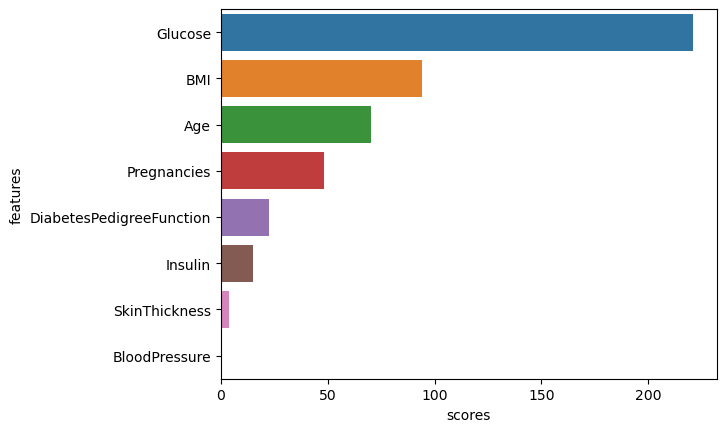

In [17]:
import seaborn as sns
sns.barplot(x=i1['scores'],y=i1['features'])

<AxesSubplot:xlabel='scores', ylabel='features'>

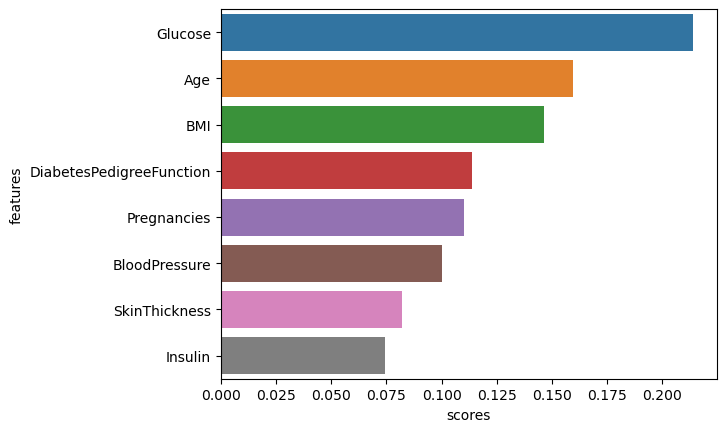

In [18]:
sns.barplot(x=i2['scores'],y=i2['features'])

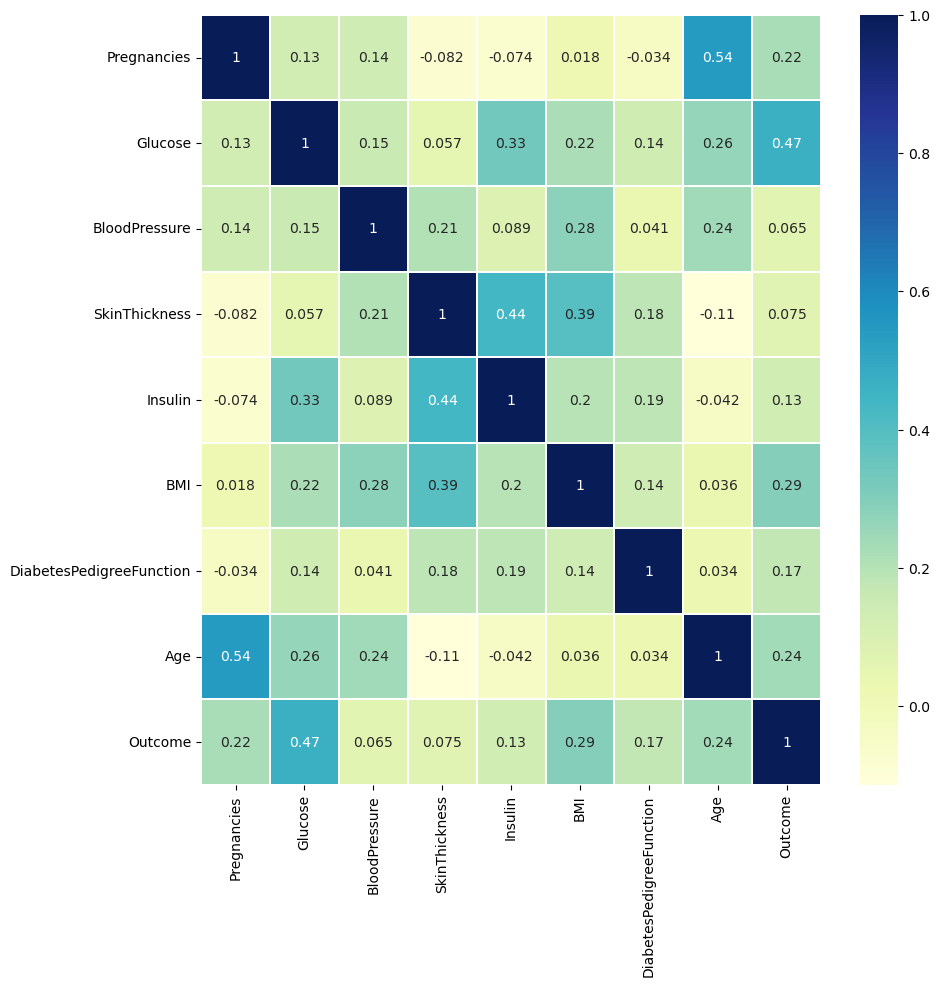

In [19]:
corr_mat = df_diabetes.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,cbar=True,annot=True,linewidths=.25, cmap='YlGnBu')
plt.show()

In [20]:
#splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=0)
X_train.shape , X_test.shape

((792, 8), (198, 8))

In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train , X_test

(array([[ 0.56508675, -1.1857207 ,  0.43067262, ..., -0.20396869,
         -0.2836198 ,  0.66840296],
        [-0.02147774,  1.77954541,  0.43067262, ...,  0.55827551,
         -0.64525885, -0.28184616],
        [-0.02147774, -0.88619887,  0.04207369, ..., -0.08568942,
          0.42126987, -0.88655014],
        ...,
        [-0.90132447, -1.12581633,  0.43067262, ...,  0.24286412,
         -1.14481109, -1.05932271],
        [-0.02147774,  0.5814581 , -0.54082472, ..., -0.42738509,
         -0.57476988,  0.23647154],
        [-0.31475998, -0.76639014,  0.52782236, ..., -1.7678835 ,
         -0.5839641 , -0.36823244]]),
 array([[-0.90132447, -1.24562506, -0.05507605, ..., -1.91244705,
          0.45804672, -0.62739129],
        [ 0.56508675,  0.01236662, -0.05507605, ..., -0.36167438,
         -0.03231131, -0.19545987],
        [-0.90132447,  2.13897161,  0.33352289, ...,  0.4925648 ,
          1.22729588, -0.45461872],
        ...,
        [-0.31475998, -0.40696394, -0.54082472, ..., -

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=0)

In [23]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier

In [24]:
models = {
    'logistic_reg' : {
        'model' : LogisticRegression(),
        'params': {
            'C' : [1,3,5,10],
            'solver' : ['lbfgs','liblinear'],
            'random_state' : [0]
        }   
    },
    
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ["gini", "entropy"],
            'splitter' : ["best", "random"],
            'random_state': [0]
        }
    },
    
    'KNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            "n_neighbors" : [5,10,15],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p' : [1,2]
        }
    },
    
#     'naive_bayes' : {
#         'model' : GaussianNB(),
#         'params' : {
            
#         }
#     },
    
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [100,150,200],
            'criterion' : ["gini", "entropy", 'log_loss'],
            'max_depth' : [1,5,10,15],
            'random_state' : [0]
        }
    },
    
    'SVM' : {
        'model' : SVC(),
        'params' : {
            'C' : [1,3,5,10],
            'kernel' : ['rbf', 'sigmoid'],
            'random_state' : [0]
        }
    },
    
    'Adaboost' : {
        'model' : AdaBoostClassifier(),
        'params' : {
            'n_estimators' : [50,100,150,200],
            'learning_rate' : [0.1,0.5,1.0,1.5],
            "random_state" : [0]
        }
    },
    
    'Gradientboost' : {
        'model' : GradientBoostingClassifier(),
        'params' : {
            'learning_rate' : [0.1,0.5,1.0,1.5],
            'n_estimators' : [50,100,150,200],
            'criterion' : ['friedman_mse', 'squared_error', 'mse'],
            'max_depth' : [1,5,10,15],
            'random_state' : [0]
        }
    },
    
    'xgboost' : {
        'model' : xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False),
        'params' : {
            'n_estimators' : [50,100,150,200],
            'max_depth' : [1,5,10,15],
            'learning_rate' : [0.1,0.3,0.5,1.0],
#             'booster' : ['gbtree','gblinear','dart'],
            'gamma' : [0,1,2],
            'base_score' : [0.5,1.0,1.5],
            'random_state' : [0]
        }
    },
    
    'bagging' : {
        'model' : BaggingClassifier(base_estimator=random_forest_model),
        'params' : {
            'n_estimators' : [10,50,100]
        }
    }
    
    
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
scores = []
for model,model_params in models.items():
    gscv = GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
    gscv.fit(X_train,y_train)
    scores.append({
        'model' : model,
        'parameters' : gscv.best_params_,
        'scores' : gscv.best_score_
    })
scores

[{'model': 'logistic_reg',
  'parameters': {'C': 1, 'random_state': 0, 'solver': 'lbfgs'},
  'scores': 0.7323939176817132},
 {'model': 'decision_tree',
  'parameters': {'criterion': 'entropy',
   'random_state': 0,
   'splitter': 'best'},
  'scores': 0.8181673433643818},
 {'model': 'KNN',
  'parameters': {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2},
  'scores': 0.748722235490805},
 {'model': 'random_forest',
  'parameters': {'criterion': 'gini',
   'max_depth': 15,
   'n_estimators': 200,
   'random_state': 0},
  'scores': 0.849773107236685},
 {'model': 'SVM',
  'parameters': {'C': 5, 'kernel': 'rbf', 'random_state': 0},
  'scores': 0.7955019504816495},
 {'model': 'Adaboost',
  'parameters': {'learning_rate': 1.5, 'n_estimators': 200, 'random_state': 0},
  'scores': 0.779070137727888},
 {'model': 'Gradientboost',
  'parameters': {'criterion': 'squared_error',
   'learning_rate': 0.1,
   'max_depth': 5,
   'n_estimators': 150,
   'random_state': 0},
  'scores': 0.8510707746198551},
 

In [27]:
#selecting best model with best parameters
df_scores = pd.DataFrame(data=scores, columns=['model','parameters','scores'])
df_scores

,model,parameters,scores
0,logistic_reg,"{'C': 1, 'random_state': 0, 'solver': 'lbfgs'}",0.732394
1,decision_tree,"{'criterion': 'entropy', 'random_state': 0, 's...",0.818167
2,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2}",0.748722
3,random_forest,"{'criterion': 'gini', 'max_depth': 15, 'n_esti...",0.849773
4,SVM,"{'C': 5, 'kernel': 'rbf', 'random_state': 0}",0.795502
5,Adaboost,"{'learning_rate': 1.5, 'n_estimators': 200, 'r...",0.779070
6,Gradientboost,"{'criterion': 'squared_error', 'learning_rate'...",0.851071
7,xgboost,"{'base_score': 0.5, 'gamma': 0, 'learning_rate...",0.853563
8,bagging,{'n_estimators': 50},0.835865


In [28]:
import xgboost as xgb

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

clf_model = xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False,base_score=0.5,gamma=0,learning_rate=0.5,max_depth=15,n_estimators=100)
clf_score = cross_val_score(clf_model, X_train, y_train, cv=5)
np.mean(clf_score)

0.8535626144415254

In [30]:
#building model
clf = xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False,base_score=0.5,gamma=0,learning_rate=0.5,max_depth=15,n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [31]:
#test data accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc

0.8737373737373737

In [32]:
#train data accuracy
clf.score(X_train,y_train)

1.0

In [33]:
# y_train_pred = clf.predict(X_train)
# accuracy_score(y_train,y_train_pred)

In [38]:
data = [2,134,70,0,0,28.9,0.542,23]
arr_ip = np.array([data])
df = pd.DataFrame(data=arr_ip, columns=X_diabetes.columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,134.0,70.0,0.0,0.0,28.9,0.542,23.0


In [40]:
op = clf.predict(df)
if op == 1:
    print("Diabetic")
else: 
    print("Non-Diabetic")

Diabetic


In [41]:
import pickle

In [43]:
with open("diabetes.pkl", 'wb') as f:
    pickle.dump(clf,f)

In [44]:
with open("diabetes.pkl", 'rb') as f:
    model = pickle.load(f)
model.predict(df)

array([1])

In [45]:
X_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')